In [1]:
import pandas as pd
from transformers import pipeline


sentiment_analysis = pipeline("sentiment-analysis")


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


In [11]:
df = pd.read_csv('clean_avis_v1.csv')

In [12]:
del(df["Unnamed: 0"])

In [2]:
def analyze_sentiment(text):
    result = sentiment_analysis(text)
    return result[0]['label']



,Unnamed: 0,note,assureur,produit,date_exp,avis_cor,avis_cor_en,avis_clean_fr,avis_clean_en,avis_token_fr,avis_token_en
0,0,5.0,Direct Assurance,auto,01/09/2021,"Meilleurs assurances , prix , solutions , écou...","Best insurance , price , solutions , listening...",meilleurs assurances prix solutions écoute rap...,best insurance price solutions listening speed...,"['meilleurs', 'assurances', 'prix', 'solutions...","['best', 'insurance', 'price', 'solutions', 'l..."
1,1,4.0,Direct Assurance,auto,01/05/2021,"je suis globalement satisfait , sauf que vous ...","I am generally satisfied , except that you hav...",globalement satisfait sauf problème site inter...,generally satisfied except problem website imp...,"['globalement', 'satisfait', 'sauf', 'problème...","['generally', 'satisfied', 'except', 'problem'..."
2,2,5.0,Direct Assurance,auto,01/03/2021,Prix tres abordable plusieurs options s'offren...,Very affordable price Several options are avai...,prix tres abordable plusieurs options soffrent...,affordable price several options available us ...,"['prix', 'tres', 'abordable', 'plusieurs', 'op...","['affordable', 'price', 'several', 'options', ..."
3,3,4.0,L'olivier Assurance,auto,01/06/2021,"je satisfait du service , une réponse très rap...","I satisfy the service , a very fast response f...",satisfait service réponse très rapide service ...,satisfy service fast response service thank ch...,"['satisfait', 'service', 'réponse', 'très', 'r...","['satisfy', 'service', 'fast', 'response', 'se..."
4,4,1.0,Matmut,auto,01/01/2017,"Client depuis plus de 25 ans , très déçu de ce...","Customer for more than 25 years , very disappo...",client depuis plus ans très déçu cette mutuel...,customer years disappointed mutual longer mut...,"['client', 'depuis', 'ans', 'très', 'déçu', 'm...","['customer', 'years', 'disappointed', 'mutual'..."


In [20]:
import pandas as pd
from transformers import pipeline

try:
    sentiment_analysis = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")
except PipelineException as e:
    print(f"Error loading sentiment analysis model: {e}")
    exit(1)

def analyze_sentiment(text):
    try:

        result = sentiment_analysis(text)
        return result[0]['label'], result[0]['score']
    except Exception as e:
        print(f"Error analyzing sentiment: {e}")
        return None, None



df['sentiment_label'], df['sentiment_score'] = zip(*df['avis_clean_en'].apply(analyze_sentiment))




Some layers from the model checkpoint at nlptown/bert-base-multilingual-uncased-sentiment were not used when initializing TFBertForSequenceClassification: ['dropout_37']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at nlptown/bert-base-multilingual-uncased-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.
Token indices

Error analyzing sentiment: Exception encountered when calling layer 'embeddings' (type TFBertEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,560] = 560 is not in [0, 512) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFBertEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 657), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 657), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False
Error analyzing sentiment: Exception encountered when calling layer 'embeddings' (type TFBertEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,525] = 525 is not in [0, 512) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFBertEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 526), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1

In [21]:
df

,note,assureur,produit,date_exp,avis_cor,avis_cor_en,avis_clean_fr,avis_clean_en,avis_token_fr,avis_token_en,sentiment_label,sentiment_score
0,5.0,Direct Assurance,auto,01/09/2021,"Meilleurs assurances , prix , solutions , écou...","Best insurance , price , solutions , listening...",meilleurs assurances prix solutions écoute rap...,best insurance price solutions listening speed...,"['meilleurs', 'assurances', 'prix', 'solutions...","['best', 'insurance', 'price', 'solutions', 'l...",5 stars,0.776171
1,4.0,Direct Assurance,auto,01/05/2021,"je suis globalement satisfait , sauf que vous ...","I am generally satisfied , except that you hav...",globalement satisfait sauf problème site inter...,generally satisfied except problem website imp...,"['globalement', 'satisfait', 'sauf', 'problème...","['generally', 'satisfied', 'except', 'problem'...",3 stars,0.316607
2,5.0,Direct Assurance,auto,01/03/2021,Prix tres abordable plusieurs options s'offren...,Very affordable price Several options are avai...,prix tres abordable plusieurs options soffrent...,affordable price several options available us ...,"['prix', 'tres', 'abordable', 'plusieurs', 'op...","['affordable', 'price', 'several', 'options', ...",4 stars,0.582998
3,4.0,L'olivier Assurance,auto,01/06/2021,"je satisfait du service , une réponse très rap...","I satisfy the service , a very fast response f...",satisfait service réponse très rapide service ...,satisfy service fast response service thank ch...,"['satisfait', 'service', 'réponse', 'très', 'r...","['satisfy', 'service', 'fast', 'response', 'se...",4 stars,0.475074
4,1.0,Matmut,auto,01/01/2017,"Client depuis plus de 25 ans , très déçu de ce...","Customer for more than 25 years , very disappo...",client depuis plus ans très déçu cette mutuel...,customer years disappointed mutual longer mut...,"['client', 'depuis', 'ans', 'très', 'déçu', 'm...","['customer', 'years', 'disappointed', 'mutual'...",1 star,0.579978
...,...,...,...,...,...,...,...,...,...,...,...,...
23505,1.0,Mgen,sante,01/07/2020,"Bonjour , Après des années de cotisations ( ~5...","Hello , After years of contributions ( ~ 50 ye...",bonjour après années cotisations ans plus con...,hello years contributions years plus “ autono...,"['bonjour', 'après', 'années', 'cotisations', ...","['hello', 'years', 'contributions', 'years', '...",1 star,0.401385
23506,4.0,Direct Assurance,auto,01/03/2021,je suis satisfait du service simple et rapide ...,I am satisfied with the service simple and fas...,satisfait service simple rapide recommande dir...,satisfied service simple fast recommend direct...,"['satisfait', 'service', 'simple', 'rapide', '...","['satisfied', 'service', 'simple', 'fast', 're...",4 stars,0.626812
23507,1.0,Eurofil,auto,01/07/2017,Odieux et irrespectueux . Tarifs compétitifs a...,Obvious and disrespectful . Competitive prices...,odieux irrespectueux tarifs compétitifs début ...,obvious disrespectful competitive prices first...,"['odieux', 'irrespectueux', 'tarifs', 'compéti...","['obvious', 'disrespectful', 'competitive', 'p...",2 stars,0.442155
23508,1.0,Mutuelle des Motards,moto,01/03/2021,Assurance moto chez la mutuel des motards en R...,Motorcycle insurance at the biker mutual in sh...,assurance moto chez mutuel motards rte augment...,motorcycle insurance biker mutual sharp increa...,"['assurance', 'moto', 'chez', 'mutuel', 'motar...","['motorcycle', 'insurance', 'biker', 'mutual',...",1 star,0.594577


In [15]:
analyze_sentiment(df.avis_clean_en.iloc[2])

'POSITIVE'

In [5]:
analyze_sentiment(df.avis_clean_fr.iloc[2])

('NEGATIVE', 0.981477677822113)

In [22]:
df.to_csv('sentiment.csv',)

In [3]:
sent = pd.read_csv('sentiment.csv')

In [5]:
del(sent["Unnamed: 0"])

In [8]:
sent['sentiment_label'] = sent['sentiment_label'].str.extract(r'(\d+)').astype(int)


In [14]:
sent.dropna(inplace=True)

In [15]:
sent['sentiment_label'] = sent['sentiment_label'].astype(int)
sent['note'] = sent['note'].astype(int)

In [16]:
sent

,note,assureur,produit,date_exp,avis_cor,avis_cor_en,avis_clean_fr,avis_clean_en,avis_token_fr,avis_token_en,sentiment_label,sentiment_score
0,5,Direct Assurance,auto,01/09/2021,"Meilleurs assurances , prix , solutions , écou...","Best insurance , price , solutions , listening...",meilleurs assurances prix solutions écoute rap...,best insurance price solutions listening speed...,"['meilleurs', 'assurances', 'prix', 'solutions...","['best', 'insurance', 'price', 'solutions', 'l...",5,0.776171
1,4,Direct Assurance,auto,01/05/2021,"je suis globalement satisfait , sauf que vous ...","I am generally satisfied , except that you hav...",globalement satisfait sauf problème site inter...,generally satisfied except problem website imp...,"['globalement', 'satisfait', 'sauf', 'problème...","['generally', 'satisfied', 'except', 'problem'...",3,0.316607
2,5,Direct Assurance,auto,01/03/2021,Prix tres abordable plusieurs options s'offren...,Very affordable price Several options are avai...,prix tres abordable plusieurs options soffrent...,affordable price several options available us ...,"['prix', 'tres', 'abordable', 'plusieurs', 'op...","['affordable', 'price', 'several', 'options', ...",4,0.582998
3,4,L'olivier Assurance,auto,01/06/2021,"je satisfait du service , une réponse très rap...","I satisfy the service , a very fast response f...",satisfait service réponse très rapide service ...,satisfy service fast response service thank ch...,"['satisfait', 'service', 'réponse', 'très', 'r...","['satisfy', 'service', 'fast', 'response', 'se...",4,0.475074
4,1,Matmut,auto,01/01/2017,"Client depuis plus de 25 ans , très déçu de ce...","Customer for more than 25 years , very disappo...",client depuis plus ans très déçu cette mutuel...,customer years disappointed mutual longer mut...,"['client', 'depuis', 'ans', 'très', 'déçu', 'm...","['customer', 'years', 'disappointed', 'mutual'...",1,0.579978
...,...,...,...,...,...,...,...,...,...,...,...,...
23505,1,Mgen,sante,01/07/2020,"Bonjour , Après des années de cotisations ( ~5...","Hello , After years of contributions ( ~ 50 ye...",bonjour après années cotisations ans plus con...,hello years contributions years plus “ autono...,"['bonjour', 'après', 'années', 'cotisations', ...","['hello', 'years', 'contributions', 'years', '...",1,0.401385
23506,4,Direct Assurance,auto,01/03/2021,je suis satisfait du service simple et rapide ...,I am satisfied with the service simple and fas...,satisfait service simple rapide recommande dir...,satisfied service simple fast recommend direct...,"['satisfait', 'service', 'simple', 'rapide', '...","['satisfied', 'service', 'simple', 'fast', 're...",4,0.626812
23507,1,Eurofil,auto,01/07/2017,Odieux et irrespectueux . Tarifs compétitifs a...,Obvious and disrespectful . Competitive prices...,odieux irrespectueux tarifs compétitifs début ...,obvious disrespectful competitive prices first...,"['odieux', 'irrespectueux', 'tarifs', 'compéti...","['obvious', 'disrespectful', 'competitive', 'p...",2,0.442155
23508,1,Mutuelle des Motards,moto,01/03/2021,Assurance moto chez la mutuel des motards en R...,Motorcycle insurance at the biker mutual in sh...,assurance moto chez mutuel motards rte augment...,motorcycle insurance biker mutual sharp increa...,"['assurance', 'moto', 'chez', 'mutuel', 'motar...","['motorcycle', 'insurance', 'biker', 'mutual',...",1,0.594577


In [19]:
sent['sent_diff'] = abs(sent.note - sent.sentiment_label)

In [20]:
sent

,note,assureur,produit,date_exp,avis_cor,avis_cor_en,avis_clean_fr,avis_clean_en,avis_token_fr,avis_token_en,sentiment_label,sentiment_score,sent_diff
0,5,Direct Assurance,auto,01/09/2021,"Meilleurs assurances , prix , solutions , écou...","Best insurance , price , solutions , listening...",meilleurs assurances prix solutions écoute rap...,best insurance price solutions listening speed...,"['meilleurs', 'assurances', 'prix', 'solutions...","['best', 'insurance', 'price', 'solutions', 'l...",5,0.776171,0
1,4,Direct Assurance,auto,01/05/2021,"je suis globalement satisfait , sauf que vous ...","I am generally satisfied , except that you hav...",globalement satisfait sauf problème site inter...,generally satisfied except problem website imp...,"['globalement', 'satisfait', 'sauf', 'problème...","['generally', 'satisfied', 'except', 'problem'...",3,0.316607,1
2,5,Direct Assurance,auto,01/03/2021,Prix tres abordable plusieurs options s'offren...,Very affordable price Several options are avai...,prix tres abordable plusieurs options soffrent...,affordable price several options available us ...,"['prix', 'tres', 'abordable', 'plusieurs', 'op...","['affordable', 'price', 'several', 'options', ...",4,0.582998,1
3,4,L'olivier Assurance,auto,01/06/2021,"je satisfait du service , une réponse très rap...","I satisfy the service , a very fast response f...",satisfait service réponse très rapide service ...,satisfy service fast response service thank ch...,"['satisfait', 'service', 'réponse', 'très', 'r...","['satisfy', 'service', 'fast', 'response', 'se...",4,0.475074,0
4,1,Matmut,auto,01/01/2017,"Client depuis plus de 25 ans , très déçu de ce...","Customer for more than 25 years , very disappo...",client depuis plus ans très déçu cette mutuel...,customer years disappointed mutual longer mut...,"['client', 'depuis', 'ans', 'très', 'déçu', 'm...","['customer', 'years', 'disappointed', 'mutual'...",1,0.579978,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23505,1,Mgen,sante,01/07/2020,"Bonjour , Après des années de cotisations ( ~5...","Hello , After years of contributions ( ~ 50 ye...",bonjour après années cotisations ans plus con...,hello years contributions years plus “ autono...,"['bonjour', 'après', 'années', 'cotisations', ...","['hello', 'years', 'contributions', 'years', '...",1,0.401385,0
23506,4,Direct Assurance,auto,01/03/2021,je suis satisfait du service simple et rapide ...,I am satisfied with the service simple and fas...,satisfait service simple rapide recommande dir...,satisfied service simple fast recommend direct...,"['satisfait', 'service', 'simple', 'rapide', '...","['satisfied', 'service', 'simple', 'fast', 're...",4,0.626812,0
23507,1,Eurofil,auto,01/07/2017,Odieux et irrespectueux . Tarifs compétitifs a...,Obvious and disrespectful . Competitive prices...,odieux irrespectueux tarifs compétitifs début ...,obvious disrespectful competitive prices first...,"['odieux', 'irrespectueux', 'tarifs', 'compéti...","['obvious', 'disrespectful', 'competitive', 'p...",2,0.442155,1
23508,1,Mutuelle des Motards,moto,01/03/2021,Assurance moto chez la mutuel des motards en R...,Motorcycle insurance at the biker mutual in sh...,assurance moto chez mutuel motards rte augment...,motorcycle insurance biker mutual sharp increa...,"['assurance', 'moto', 'chez', 'mutuel', 'motar...","['motorcycle', 'insurance', 'biker', 'mutual',...",1,0.594577,0


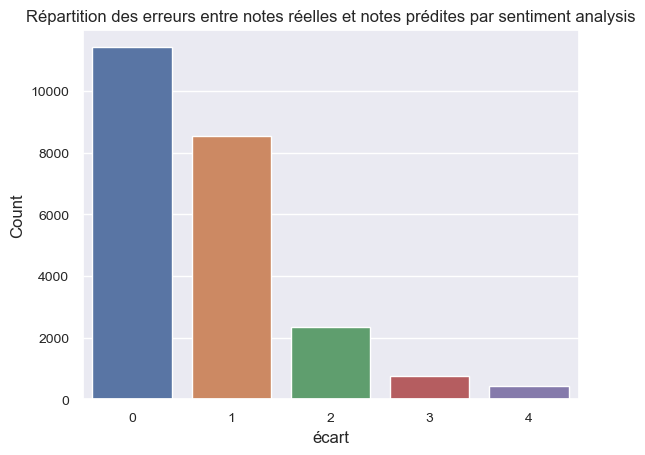

In [25]:
import seaborn as  sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
sns.countplot(x='sent_diff', data=sent)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xlabel('écart')
plt.ylabel('Count')
plt.title('Répartition des erreurs entre notes réelles et notes prédites par sentiment analysis')

plt.show()

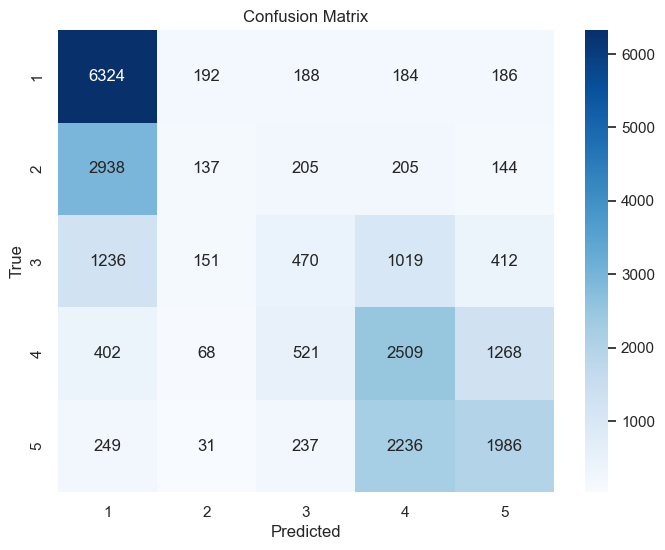

In [29]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(sent.note, sent.sentiment_label)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(sent['note'].unique()), yticklabels=sorted(sent['note'].unique()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [31]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(sent.note, sent.sentiment_label)
classification_rep = classification_report(sent.note, sent.sentiment_label)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.49
Classification Report:
               precision    recall  f1-score   support

           1       0.57      0.89      0.69      7074
           2       0.24      0.04      0.07      3629
           3       0.29      0.14      0.19      3288
           4       0.41      0.53      0.46      4768
           5       0.50      0.42      0.45      4739

    accuracy                           0.49     23498
   macro avg       0.40      0.40      0.37     23498
weighted avg       0.43      0.49      0.43     23498

